# UNIDADE 3:  Regressão Linear

3.1 Previsões simples (Regressão linear)

3.2 Previsões complexas (Regressão linear múltipla)

3.3   Algoritmos de Classificação

3.3.1 Métodos simbólicos: Árvore de Decisão

3.3.2 Métodos ensemble: Random Forest


<div style="border: 2px solid #00008B; padding: 15px; border-radius: 10px; background-color: #00008B; color: #FFFFFF; font-family: Arial;">
  <h1 style="margin-top: 0;"> Predição de Cargas de Trabalho para Juízes</h1>
  <p>Descrição: Prever o volume de trabalho em diferentes tribunais com base em fatores como tamanho da população, tipos de casos comuns na região, etc.
</p>
</div>


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px;">
  <ul>
    <li>Tamanho da população da região onde o tribunal está localizado (valores real entre 30,000 e 500,000)</li>
    <li>Número de juízes ativos no tribunal (valores inteiros entre 1 e 20)</li>
    <li>Número de casos recebidos mensalmente (valores inteiros entre 150 e 800)</li>
    <li>Distribuição dos tipos de casos comuns na região (valores: criminal, civil, trabalhista)</li>
    <li>Taxa de crescimento da população na região (valores reais entre 0.0 e 1.0)</li>
    <li>Taxa de criminalidade na região (valores reais entre 0.0 e 1.0)</li>
    <li>Média de tempo gasto em cada tipo de caso em meses (número inteiro)</li>
    <li>Nível de automação e eficiência do tribunal (valores inteiros entre 0 e 10)</li>
    <li>Nível de congestionamento do sistema judicial na região (baixo, médio, alto)</li>
    <li>Número de advogados atuando na região (valores inteiros entre 1 e 100)</li>
    <li>Número de prédios judiciais na região (valores inteiros entre 1 e 10)</li>
    <li>Nível de urbanização da região (baixo, médio, alto)</li>
    <li>Nível de educação da população na região (valores reais entre 0.0 e 1.0)</li>
    <li>Número de habitantes por juiz (valor fruto da divisão de tamanho da população da região pelo número de juízes ativos no tribunal)</li>
    <li>Índice de Desenvolvimento Humano (valores reais entre 0.0 e 1.0)</li>
    <li>Média de idade dos  es (entre 35 e 60)</li>
    <li><b>Número de casos pendentes atualmente no tribunal (valores inteiros, coluna que não pode ser nula)</b></li>
  </ul>
</div>


In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', '{:.5f}'.format)

import streamlit as st
import joblib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Treinando o Modelo

In [2]:
df_normalizado = pd.read_csv("../data/processed/predicao_cargas_trabalho_normalizado.csv")

In [3]:
X = df_normalizado.loc[:, df_normalizado.columns != 'casos_pendentes']
y = df_normalizado["casos_pendentes"]

In [47]:
X

,populacao,num_juizes,casos_recebidos,tipo_caso,taxa_crescimento_populacao,taxa_criminalidade,tempo_casos,nivel_automacao,congestionamento,advogados,...,nivel_educacao,habitantes_por_juiz,idh,idade_juizes_18-29,idade_juizes_30-39,idade_juizes_40-49,idade_juizes_50-59,idade_juizes_60-69,idade_juizes_70-79,idade_juizes_80-89
0,0.43482,0.31579,0.41271,1.00000,0.87225,1.00000,0.18182,0.40000,0.66667,0.17347,...,0.86473,0.20807,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1,0.30901,1.00000,0.53339,1.00000,0.54684,0.69849,0.63636,0.60000,1.00000,0.98980,...,0.80249,0.05870,0.82631,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
2,0.38186,0.73684,0.39984,0.50000,1.00000,1.00000,0.59091,0.30000,0.33333,0.11224,...,0.60650,0.10086,0.93835,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.03183,0.52632,0.48190,0.50000,1.00000,0.74196,0.36364,0.80000,1.00000,0.91837,...,1.00000,0.02087,0.74196,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
4,0.98052,0.36842,0.53017,0.50000,0.79694,0.65267,0.86364,0.40000,1.00000,0.23469,...,1.00000,0.48477,0.75420,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,0.07301,0.10526,0.72647,0.00000,0.66371,0.96175,0.95455,0.60000,0.00000,0.22449,...,0.89112,0.16157,0.21590,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4335,0.79488,0.47368,0.57200,0.50000,0.42938,0.45139,0.27273,0.50000,1.00000,0.74490,...,0.46147,0.31468,0.57341,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
4336,0.45132,0.84211,0.59212,1.00000,0.84879,0.56073,1.00000,0.50000,0.33333,0.21429,...,0.50786,0.10310,0.87934,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
4337,0.03871,0.05263,0.55833,0.50000,0.77827,0.58441,0.45455,1.00000,1.00000,0.46939,...,0.90758,0.18321,0.03391,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000


In [48]:
y

0      0.49684
1      0.54882
2      0.50814
3      0.44349
4      0.48870
         ...  
4334   0.45976
4335   0.48644
4336   0.23101
4337   0.41546
4338   0.39986
Name: casos_pendentes, Length: 4339, dtype: float64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
X_train.to_csv('../data/train/X_train.csv', index=False)
X_test.to_csv('../data/train/X_test.csv', index=False)

y_train.to_csv('../data/train/y_train.csv', index=False)
y_test.to_csv('../data/train/y_test.csv', index=False)

### Utilizando o modelo LinearRegression() 

In [6]:
modelLinearRegression = LinearRegression()
modelLinearRegression.fit(X_train,y_train)
print('Coefficients: \n', modelLinearRegression.coef_)

Coefficients: 
 [-7.01207437e-03  1.47212982e-03  8.31251602e-01  4.15858334e-03
 -5.69064524e-03  2.35372777e-02 -8.68796211e-03  1.26762586e-03
 -3.83475580e-03 -7.45306410e-03  5.79100974e-03 -1.59067460e-02
  1.14327524e-02  3.53969233e-02 -2.49800181e-16 -9.89342668e-04
 -3.17705272e-03  1.49663151e-03  2.04834685e-03 -7.29381771e-03
  7.91523474e-03]


In [49]:
modelLinearRegression.coef_

array([-7.01207437e-03,  1.47212982e-03,  8.31251602e-01,  4.15858334e-03,
       -5.69064524e-03,  2.35372777e-02, -8.68796211e-03,  1.26762586e-03,
       -3.83475580e-03, -7.45306410e-03,  5.79100974e-03, -1.59067460e-02,
        1.14327524e-02,  3.53969233e-02, -2.49800181e-16, -9.89342668e-04,
       -3.17705272e-03,  1.49663151e-03,  2.04834685e-03, -7.29381771e-03,
        7.91523474e-03])

In [7]:
coeffecients = pd.DataFrame(modelLinearRegression.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
populacao,-0.00701
num_juizes,0.00147
casos_recebidos,0.83125
tipo_caso,0.00416
taxa_crescimento_populacao,-0.00569
taxa_criminalidade,0.02354
tempo_casos,-0.00869
nivel_automacao,0.00127
congestionamento,-0.00383
advogados,-0.00745


In [8]:
# Fazendo a previsão
#data_new = np.array([[....]])
#predictions_new = modelLinearRegression.predict(data_new)
#print(predictions_new)

# Avaliação do Desempenho

* **Erro de Treinamento vs. Erro de Validação/Teste**: Compare o erro do modelo no conjunto de treinamento com o erro nos conjuntos de validação e test.
* **Overfitting**: Se o <b>erro</b> no conjunto de <span style="color:red"><b>treinamento é muito baixo</b></span>, mas o erro no conjunto de <span style="color:red"><b>validação/teste é significativamente maior</b></span>, o modelo pode estar overfitting.
     * Muitas features confundem o modelo.
     * Usar um modelo complexo para um problema simples.
     * Pouca regularização.
</br></br>
* **Underfitting**: Se o <b>erro</b> no conjunto de <span style="color:red"><b>treinamento e nos conjuntos de validação/teste é alto</b></span>, o modelo pode estar underfitting.
     * Poucas features perdem detalhes importantes.
     * Usar um modelo simples para um problema complexo.
     * Excessiva regularização limita a flexibilidade do modelo.
 
<img src="../img/overfitting_2.png" width=400 />


<img src="../img/overunder.png" width=300 />

# Métricas de avaliação: regressão

https://towardsai.net/p/l/5-regression-metrics-explained-in-just-5mins

 As métricas abaixo são identificadas também como **funções de perda**, o objetivo é encontrar um modelo que tenha a menor função de perda.

**Mean Absolute Error** (MAE): Erro Absoluto Médio é a <b>média do valor absoluto dos erros (diferenças absolutas entre os valores preditos e os valores observados)</b>.  <b>MAE é menos sensível a outliers</b> do que outras métricas como MSE, porque não eleva os erros ao quadrado. MAE é útil quando <span style="color:red"><b>se quer uma métrica que seja robusta a outliers</b></span> e deseja-se entender a média absoluta dos erros em termos simples.

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

<img src="../img/mae.png" width=500 />

<b>Interpretação do MAE:</b> Um MAE mais baixo indica uma maior precisão nos resultados da simulação.

</br></br>

**Mean Squared Error** (MSE): Erro Médio Quadrático é a <b>média dos erros quadrados, pune erros maiores</b>. MSE é preferido quando se deseja <span style="color:red"><b>penalizar mais fortemente os erros maiores</b></span>, o que é comum em modelos onde grandes desvios são particularmente indesejáveis.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

<img src="../img/mse.png" width=500 />

<b>Interpretação do MSE:</b> Um valor de <b>MSE mais baixo indica uma maior precisão na previsão</b>, pois implica que as <span style="color:red"><b>previsões do modelo estão mais próximas dos valores reais</b></span>. Por outro lado, um MSE mais alto sugere uma menor precisão e maiores discrepâncias entre as previsões do modelo e os valores reais.

</br></br>

**Root Mean Square Error** (RMSE): Raiz do Erro Quadrático Médio é a <b>raiz quadrada da média dos erros quadrados</b>. RMSE é frequentemente usado em contextos onde é importante <b>manter as unidades do erro comparáveis com os dados originais e ao mesmo tempo penalizar erros maiores</b>. O RMSE, em particular, <span style="color:red"><b>nos dá uma ideia do erro médio em relação às unidades dos dados originais</b></span>. Ela é boa para acompanhar a melhoria do modelo, mas não é boa para dizer o quao bom o modelo é. Por exemplo, um RMSE de 2 significa que as predições estão longe 2 unidades da média.

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

<img src="../img/rmse.png" width=500 />

</br></br>

**Coeficiente de Determinação** (R²): O R² <b>mede a proporção da variância nos valores dependentes que é explicada pelo modelo</b>. Ele é uma medida de <span style="color:red"><b>quão bem os valores preditos se ajustam aos valores reais</b></span>. O R² varia de 0 a 1 (ou pode ser negativo se o modelo for pior que uma linha horizontal). Um valor de R² de 1 indica que o modelo explica 100% da variância nos dados; um valor de 0.75 que explica 75% dos dados, um valor de 0 indica que o modelo não explica nenhuma variância em relação aos valores reais. Em geral, <span style="color:red"><b>quanto mais próximo de 1, melhor o modelo se ajusta aos dados</b></span>. Um R² muito alto no treinamento, mas muito baixo no teste, pode indicar overfitting.

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

<img src="../img/fig5.png" width=500 height=200/>
<img src="../img/fig6.png" width=500 height=200/>


<img src="../img/fig3.png" />

### Sinais de Overfitting

* Treino: BAIXO erro (MAE, MSE, RMSE) e ALTO R²
* Teste: ALTO erro (MAE, MSE, RMSE) e BAIXO R²

### Sinais de Underfitting

* Treino: ALTO erro (MAE, MSE, RMSE) e BAIXO R²
* Teste: ALTO erro (MAE, MSE, RMSE) e BAIXO R²

In [9]:
predictions = modelLinearRegression.predict(X_test)
predictions_train = modelLinearRegression.predict(X_train)

In [10]:
from sklearn.metrics import r2_score

print("Test")
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test, predictions))

print("\nTrain")
print('MAE:', metrics.mean_absolute_error(y_train, predictions_train))
print('MSE:', metrics.mean_squared_error(y_train, predictions_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train)))
print('R2:', r2_score(y_train, predictions_train))

Test
MAE: 0.05603473590500645
MSE: 0.005332001780353731
RMSE: 0.07302055724488639
R2: 0.7877229388293282

Train
MAE: 0.05468583407653032
MSE: 0.005008915666045202
RMSE: 0.07077369331923551
R2: 0.8002828038468607


# Diagnóstico de Resíduos

Analise a distribuição dos resíduos (<span style="color:red"><b>diferença entre valores previstos e reais</b></span>).

* **Overfitting**: Pode apresentar <b>resíduos sistematicamente distribuídos em uma direção específica ou grandes resíduos em dados de teste</b>.
* **Underfitting**: <b>Resíduos altos e de distribuição uniforme</b> indicam que o modelo não está capturando bem a variação nos dados.

### Histograma dos Resíduos

Verificar se os resíduos seguem uma distribuição normal, que é uma suposição comum em regressão linear.

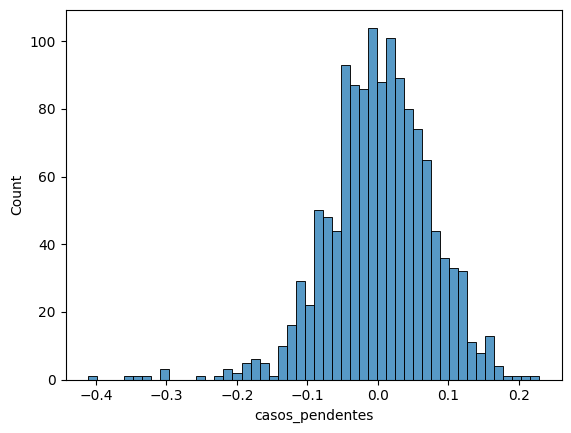

In [11]:
sns.histplot((y_test-predictions),bins=50);
plt.show()

Os resíduos se aproximam de uma distribuição normal nos quantis mais centrais, entretanto, montra ter uma cauda, se distanciando do caso ideal, o que foi confirmado no histograma.

In [12]:
models_result = []
metric_model = {
    'MODEL': 'LinearRegression',
    'MAE': metrics.mean_absolute_error(y_test, predictions),
    'MSE': metrics.mean_squared_error(y_test, predictions),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions)),
    'R2': r2_score(y_test, predictions)
}

models_result.append(metric_model)
models_result

[{'MODEL': 'LinearRegression',
  'MAE': 0.05603473590500645,
  'MSE': 0.005332001780353731,
  'RMSE': 0.07302055724488639,
  'R2': 0.7877229388293282}]

# Salvando o modelo

In [13]:
joblib.dump(modelLinearRegression, '../models/model.pkl')

['../models/model.pkl']

In [2]:
!streamlit run ../app_model.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.0.108:8501

^C
  Stopping...


# Testando outros modelos

<h2>✅ Ridge</h2>

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
A regressão ridge é uma técnica de regularização usada para aumentar a robustez da regressão linear, especialmente quando há <b>multicolinearidade entre as variáveis preditoras. A regressão ridge adiciona uma <span style="color:red">penalização do tipo L2 ao termo de erro da regressão linear, que é o quadrado da magnitude dos coeficientes</span>.</b>

Quando há um grande número de variáveis preditoras em relação ao número de observações, o modelo linear simples pode se ajustar demais aos dados de treinamento, levando ao overfitting. A regularização L2 da regressão ridge pode ajudar a prevenir isso. <b>Se você tem um número pequeno de variáveis preditivas que não são altamente correlacionadas</b>, a regularização pode <b>não ser necessária</b> e pode até prejudicar o desempenho do modelo.

</div>

*  **alpha:** parâmetro de regularização que controla a força da penalização. Um alpha maior aumenta a penalização e pode levar a mais coeficientes sendo encolhidos a zero, promovendo um modelo mais esparso.

In [15]:
from sklearn.linear_model import Ridge

modelRidge = Ridge(alpha=1.0)
modelRidge.fit(X_train,y_train)

predictions = modelRidge.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test, predictions))

MAE: 0.05606258235902014
MSE: 0.005331133906148566
RMSE: 0.07301461433267019
R2: 0.787757490540548


In [16]:
metric_model = {
    'MODEL': 'Ridge',
    'MAE': metrics.mean_absolute_error(y_test, predictions),
    'MSE': metrics.mean_squared_error(y_test, predictions),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions)),
    'R2': r2_score(y_test, predictions)
}

models_result.append(metric_model)

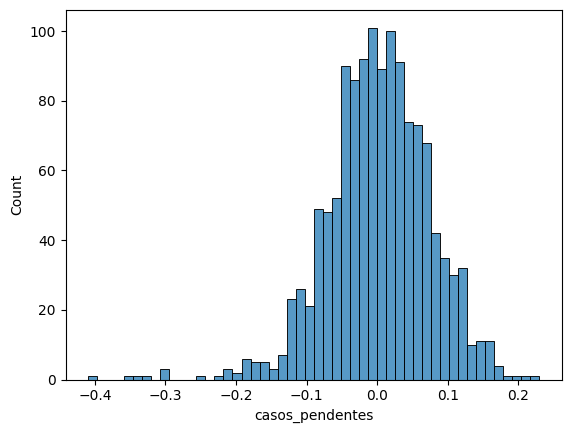

In [17]:
sns.histplot((y_test-predictions),bins=50);
plt.show()

<h2>✅ Lasso</h2>

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
A regressão Lasso (Least Absolute Shrinkage and Selection Operator) é uma técnica de regularização que <b>adiciona uma <span style="color:red">penalização do tipo L1 ao termo de erro da regressão linear, que é a soma das magnitudes dos coeficientes</span></b>. A principal característica da regressão Lasso é sua capacidade de realizar a seleção de variáveis, tornando alguns coeficientes exatamente zero e eliminando variáveis irrelevantes.

Quando você deseja um modelo que possa realizar a seleção de variáveis automaticamente, o Lasso é uma excelente escolha, pois encolhe alguns coeficientes exatamente a zero. <b>Se você tem poucas variáveis preditoras, a seleção de variáveis pode não ser necessária e a regularização L1 pode ser desnecessária</b>.
</div>

*  **alpha:** é o parâmetro de regularização que controla a força da penalização. Um alpha maior aumenta a penalização e pode levar a mais coeficientes sendo encolhidos a zero, promovendo um modelo mais esparso.

In [18]:
from sklearn.linear_model import Lasso

modelLasso = Lasso(alpha=0.1)
modelLasso.fit(X_train,y_train)

predictions = modelLasso.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test, predictions))

MAE: 0.13109729477421736
MSE: 0.025134085046412052
RMSE: 0.15853733013524623
R2: -0.0006353952327682322


In [19]:
metric_model = {
    'MODEL': 'Lasso',
    'MAE': metrics.mean_absolute_error(y_test, predictions),
    'MSE': metrics.mean_squared_error(y_test, predictions),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions)),
    'R2': r2_score(y_test, predictions)
}

models_result.append(metric_model)

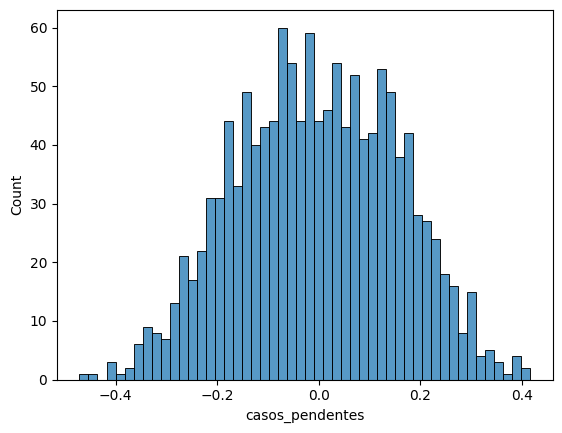

In [20]:
sns.histplot((y_test-predictions),bins=50);
plt.show()

<h2>✅ ElasticNet</h2>

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
O modelo ElasticNet é uma <b>combinação das técnicas de <span style="color:red">regularização L1 (Lasso) e L2 (Ridge)</span></b>. Ele é particularmente útil quando há necessidade de selecionar variáveis e manter a estabilidade numérica.</div>

*  **alpha:** parâmetro de regularização que controla a força da penalização. Um alpha maior aumenta a penalização e pode levar a mais coeficientes sendo encolhidos a zero, promovendo um modelo mais esparso.

*  **l1_ratio** controla a mistura entre L1 e L2.
    *  **l1_ratio=0** corresponde a Ridge (penalização L2).
    *  **l1_ratio=1** corresponde a Lasso (penalização L1).

Valores intermediários entre 0 e 1 proporcionam uma combinação de ambas as penalizações.

In [21]:
from sklearn.linear_model import ElasticNet

modelElasticNet = ElasticNet(alpha=0.1, l1_ratio=0.7)
modelElasticNet.fit(X_train,y_train)

predictions = modelElasticNet.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test, predictions))

MAE: 0.13109729477421736
MSE: 0.025134085046412052
RMSE: 0.15853733013524623
R2: -0.0006353952327682322


In [22]:
metric_model = {
    'MODEL': 'ElasticNet',
    'MAE': metrics.mean_absolute_error(y_test, predictions),
    'MSE': metrics.mean_squared_error(y_test, predictions),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions)),
    'R2': r2_score(y_test, predictions)
}

models_result.append(metric_model)

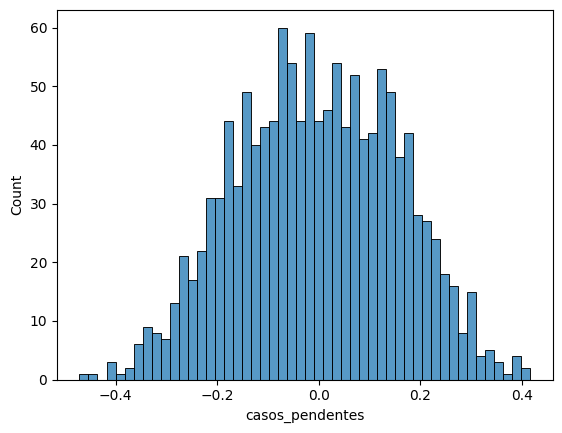

In [23]:
sns.histplot((y_test-predictions),bins=50);
plt.show()

<h2>✅ DecisionTreeRegressor</h2>

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
DecisionTreeRegressor é uma <b>implementação do algoritmo de árvores de decisão para problemas de regressão</b>. As árvores de decisão fazem divisões recursivas no espaço de características, dividindo os dados em subconjuntos cada vez menores até atingir um critério de parada. O critério para dividir um nó pode ser baseado em diferentes métricas de erro, como o mean squared error (MSE) ou mean absolute error (MAE).
As árvores de decisão são propensas a overfitting, especialmente em conjuntos de dados com muito ruído. Em tais casos, <span style="color:red">técnicas de ensemble como Random Forests ou Gradient Boosting podem ser mais adequadas</span>.
</div>

*  **max_depth:** A profundidade máxima da árvore. Limitar a profundidade pode prevenir overfitting.

In [24]:
from sklearn.tree import DecisionTreeRegressor

modelDecisionTree = DecisionTreeRegressor(max_depth=5)
modelDecisionTree.fit(X_train,y_train)

predictions = modelDecisionTree.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test, predictions))

MAE: 0.058358164051694555
MSE: 0.005727104919937314
RMSE: 0.07567763817626257
R2: 0.7719931366302477


In [25]:
metric_model = {
    'MODEL': 'DecisionTreeRegressor',
    'MAE': metrics.mean_absolute_error(y_test, predictions),
    'MSE': metrics.mean_squared_error(y_test, predictions),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions)),
    'R2': r2_score(y_test, predictions)
}

models_result.append(metric_model)

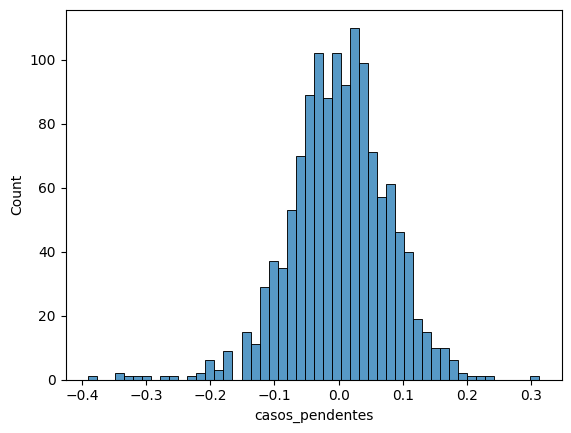

In [26]:
sns.histplot((y_test-predictions),bins=50);
plt.show()

<h2>✅ RandomForestRegressor</h2>

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
RandomForestRegressor é uma implementação do algoritmo de regressão <b>baseado em florestas aleatórias</b>. As florestas aleatórias são um poderoso <b>método de ensemble</b> que <span style="color:red">combina múltiplas árvores de decisão para melhorar a precisão do modelo</span> e reduzir o risco de overfitting. O RandomForestRegressor constrói um grande número de árvores de decisão independentes durante o treinamento e <b>faz a média das previsões de todas as árvores para produzir uma previsão final</b>. Cada árvore é <b>treinada em um subconjunto diferente dos dados</b>, o que ajuda a reduzir a variância do modelo. </div>

*  **n_estimators:** O número de árvores na floresta. Um número maior geralmente melhora o desempenho até certo ponto, mas aumenta o tempo de treinamento.
*  **max_depth:** A profundidade máxima das árvores. Limitar a profundidade pode ajudar a prevenir overfitting.
*  **bootstrap:** Se verdadeiro, amostras de bootstrap são usadas ao construir árvores. Se falso, todo o conjunto de dados é usado para construir cada árvore.


In [27]:
from sklearn.ensemble import RandomForestRegressor

modelRandomForest = RandomForestRegressor(n_estimators=100, max_depth=5, bootstrap=True)
modelRandomForest.fit(X_train,y_train)

predictions = modelRandomForest.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test, predictions))

MAE: 0.05638630079568555
MSE: 0.00530535875653528
RMSE: 0.07283789368546623
R2: 0.7887836479269358


In [28]:
metric_model = {
    'MODEL': 'RandomForestRegressor',
    'MAE': metrics.mean_absolute_error(y_test, predictions),
    'MSE': metrics.mean_squared_error(y_test, predictions),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions)),
    'R2': r2_score(y_test, predictions)
}

models_result.append(metric_model)

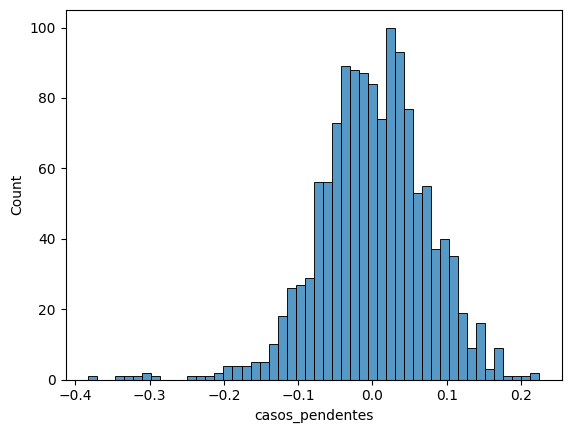

In [29]:
sns.histplot((y_test-predictions),bins=50);
plt.show()

<h2>✅ GradientBoostingRegressor</h2>

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
O GradientBoostingRegressor é uma implementação do algoritmo de Boosting baseado em gradiente para problemas de regressão. Combina o poder de múltiplos modelos de regressão (geralmente árvores de decisão) para formar um modelo robusto e preciso.O Gradient Boosting funciona <span style="color:red"><b>adicionando iterativamente modelos fracos (geralmente árvores de decisão) para corrigir os erros dos modelos anteriores</b></span>. Ele ajusta cada novo modelo aos resíduos (diferença entre as previsões e os valores reais) dos modelos anteriores. </div>

*  **n_estimators:** O número de árvores na floresta. Mais árvores podem aumentar a precisão até certo ponto, mas também aumentam o tempo de treinamento.
*  **learning_rate:** Taxa de aprendizado que reduz a contribuição de cada árvore. Valores menores exigem mais árvores para um bom desempenho.
*  **max_depth:** A profundidade máxima das árvores de decisão. Limitar a profundidade pode ajudar a prevenir overfitting.


In [30]:
from sklearn.ensemble import GradientBoostingRegressor

modelGradientBoosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
modelGradientBoosting.fit(X_train,y_train)

predictions = modelGradientBoosting.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test, predictions))

MAE: 0.05729269668605318
MSE: 0.005377999410518814
RMSE: 0.07333484445008943
R2: 0.7858916862989489


In [31]:
metric_model = {
    'MODEL': 'GradientBoostingRegressor',
    'MAE': metrics.mean_absolute_error(y_test, predictions),
    'MSE': metrics.mean_squared_error(y_test, predictions),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions)),
    'R2': r2_score(y_test, predictions)
}

models_result.append(metric_model)

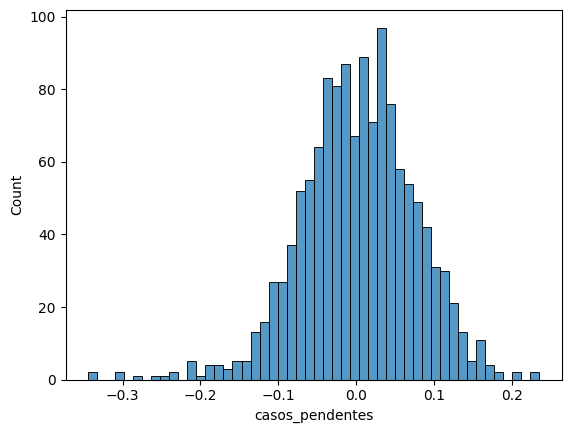

In [32]:
sns.histplot((y_test-predictions),bins=50);
plt.show()

<h2>✅ SVR</h2>

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
O SVR (Support Vector Regression) é uma implementação do algoritmo de regressão <b>baseado em máquinas de vetor de suporte (Support Vector Machines, SVM)</b>. O SVR é particularmente útil para problemas de regressão onde se deseja minimizar o erro, mas de uma maneira que permita a insensibilidade ao erro dentro de uma margem especificada (epsilon). O SVR tenta <b>encontrar uma função que tenha no máximo uma margem de erro epsilon para todos os pontos de treinamento</b>, ao mesmo tempo que tenta ser o mais plana possível.</div>

*  **kernel** SVR pode usar diferentes tipos de kernels (linear, polinomial, radial basis function (RBF), sigmoid),  permitindo modelar relações não lineares. O kernel mais comum é o RBF.


In [33]:
from sklearn.svm import SVR

modelSVR = SVR(kernel='rbf')
modelSVR.fit(X_train,y_train)

predictions = modelSVR.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test, predictions))

MAE: 0.06209026547234429
MSE: 0.006455573085585284
RMSE: 0.08034658104477928
R2: 0.7429914431330857


In [34]:
metric_model = {
    'MODEL': 'SVR',
    'MAE': metrics.mean_absolute_error(y_test, predictions),
    'MSE': metrics.mean_squared_error(y_test, predictions),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions)),
    'R2': r2_score(y_test, predictions)
}

models_result.append(metric_model)

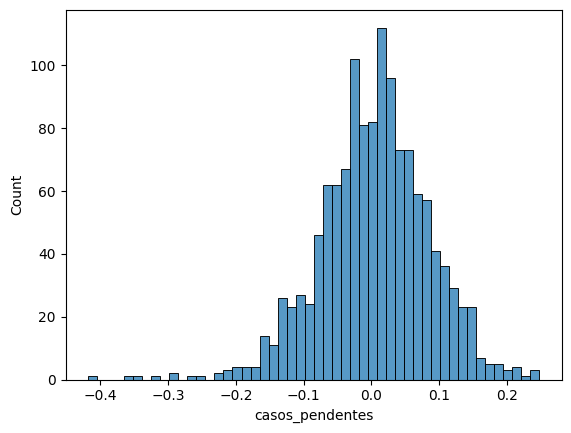

In [35]:
sns.histplot((y_test-predictions),bins=50);
plt.show()

<h2>✅ KNeighborsRegressor</h2>

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
O KNeighborsRegressor é uma <b>implementação do algoritmo de regressão baseado nos vizinhos mais próximos (k-Nearest Neighbors, k-NN)</b>. O KNN é um algoritmo baseado em instâncias, o que significa que ele faz previsões para novos dados com base nas observações mais próximas no conjunto de treinamento.</div>

*  **n_neighbors:** O número de vizinhos a serem considerados. Um valor menor de k pode captar mais detalhes e levar a um modelo mais complexo (potencialmente overfitting), enquanto um valor maior de k pode resultar em um modelo mais suave (potencialmente underfitting).
*  **weights:** Pode ser uniform (todos os vizinhos contribuem igualmente) ou distance (os vizinhos mais próximos têm um peso maior).
*  **algorithm:** O algoritmo usado para encontrar os vizinhos mais próximos (auto, ball_tree, kd_tree, brute). O padrão auto tenta escolher o método mais apropriado com base nos dados.
*  **metric:** A métrica de distância usada para encontrar os vizinhos. O padrão é a distância Euclidiana.


In [36]:
from sklearn.neighbors import KNeighborsRegressor

modelKNeighbors = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='kd_tree', metric='minkowski')
modelKNeighbors.fit(X_train,y_train)

predictions = modelKNeighbors.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test, predictions))

MAE: 0.11404499355573519
MSE: 0.020154884119434092
RMSE: 0.14196789820038222
R2: 0.19759599764704538


In [37]:
metric_model = {
    'MODEL': 'KNeighborsRegressor',
    'MAE': metrics.mean_absolute_error(y_test, predictions),
    'MSE': metrics.mean_squared_error(y_test, predictions),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions)),
    'R2': r2_score(y_test, predictions)
}

models_result.append(metric_model)

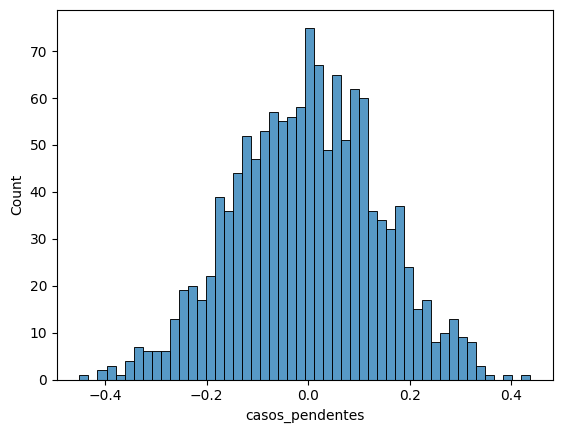

In [38]:
sns.histplot((y_test-predictions),bins=50);
plt.show()

<h2>✅ BayesianRidge</h2>

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
O BayesianRidge é uma implementação da regressão linear bayesiana, que <b>combina princípios de regressão ridge com <span style="color:red">probabilidade bayesiana</span></b> para fornecer estimativas dos coeficientes de regressão. Assim como a regressão ridge, o BayesianRidge <b>adiciona uma penalização L2 aos coeficientes de regressão, mas faz isso no contexto de uma abordagem bayesiana</b>.</div>

In [39]:
from sklearn.linear_model import BayesianRidge

modelBayesianRidge = BayesianRidge()
modelBayesianRidge.fit(X_train,y_train)

predictions = modelBayesianRidge.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test, predictions))

MAE: 0.056037225780609025
MSE: 0.0053315672291390824
RMSE: 0.073017581644006
R2: 0.7877402391338992


In [40]:
metric_model = {
    'MODEL': 'BayesianRidge',
    'MAE': metrics.mean_absolute_error(y_test, predictions),
    'MSE': metrics.mean_squared_error(y_test, predictions),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions)),
    'R2': r2_score(y_test, predictions)
}

models_result.append(metric_model)

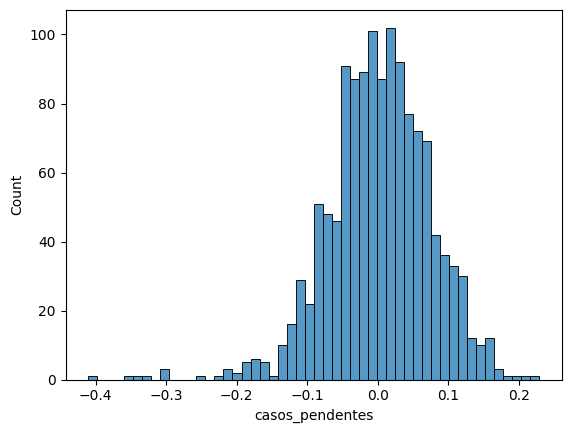

In [41]:
sns.histplot((y_test-predictions),bins=50);
plt.show()

<h2>✅ MLPRegressor</h2>

<div style="background-color: #ffcccc; padding: 20px; border-radius: 10px;">
O MLPRegressor é uma <b>implementação de uma rede neural feedforward (perceptron multicamada) para problemas de regressão</b>. <span style="color:red">É uma rede neural feedforward</span> composta por uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída.</div>

*  **hidden_layer_sizes** é o número de camadas ocultas e o número de neurônios em cada camada são especificados pelo usuário. 
*  **activation** diferentes funções de ativação podem ser usadas para os neurônios nas camadas ocultas, como relu (retificação linear), tanh (hiperbólica tangente), logistic (sigmóide), e identity (linear).
*  **solver** suporta vários algoritmos de otimização, incluindo adam (um método de otimização estocástica eficiente), sgd (gradiente descendente estocástico) e lbfgs (um otimizador baseado em aproximação quase-Newtoniana).
*  **max_iter** número máximo de iterações

In [42]:
from sklearn.neural_network import MLPRegressor

modelMLP = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
modelMLP.fit(X_train,y_train)

predictions = modelMLP.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', r2_score(y_test, predictions))

MAE: 0.05960559935474996
MSE: 0.0060147631664844966
RMSE: 0.07755490420653291
R2: 0.7605409185489377


In [43]:
metric_model = {
    'MODEL': 'MLPRegressor',
    'MAE': metrics.mean_absolute_error(y_test, predictions),
    'MSE': metrics.mean_squared_error(y_test, predictions),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, predictions)),
    'R2': r2_score(y_test, predictions)
}

models_result.append(metric_model)

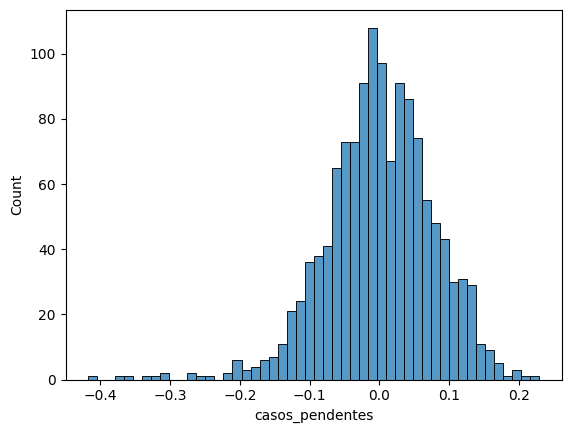

In [44]:
sns.histplot((y_test-predictions),bins=50);
plt.show()

<div style="background-color: #ff87b2; padding: 20px; border-radius: 10px;">
<h3>Atividade 3 (20/08 hoje em sala e postar):</h3>

Para o estudo de caso do Predição de Cargas de Trabalho para Juízes cujo objetivo prever o volume de trabalho em diferentes tribunais com base em fatores como tamanho da população, tipos de casos comuns na região, etc.

Execute os modelos: BayesianRidge, Ridge, RandomForestRegressor, GradientBoostingRegressor, DecisionTreeRegressor, MLPRegressor, SVR, KNeighborsRegressor,Lasso, ElasticNet e LinearRegression+PolynomialFeatures.

Monte um DataFrame comparativo mostrando as métricas MAE, MSE, RMSE, R2 de cada modelo.

<img src="../img/fig4.png" />

Troque o modelo gravado pelo de melhor execução e teste no App Streamlit.

Poste no AVA o Jupyter Notebook ou o link para o repositório GitHub.
  
</div>.


,MODEL,MAE,MSE,RMSE,R2
0,RandomForestRegressor,0.05639,0.00531,0.07284,0.78878
1,Ridge,0.05606,0.00533,0.07301,0.78776
2,BayesianRidge,0.05604,0.00533,0.07302,0.78774
3,LinearRegression,0.05603,0.00533,0.07302,0.78772
4,GradientBoostingRegressor,0.05729,0.00538,0.07333,0.78589
5,DecisionTreeRegressor,0.05836,0.00573,0.07568,0.77199
6,MLPRegressor,0.05961,0.00601,0.07755,0.76054
7,SVR,0.06209,0.00646,0.08035,0.74299
8,KNeighborsRegressor,0.11404,0.02015,0.14197,0.19760
9,Lasso,0.13110,0.02513,0.15854,-0.00064


In [46]:
df.to_csv('./result.csv', index=False)